<h1 style="font-size:300%; background-color:powderblue; color:red; text-align:center; line-height : 60px;">
TAREA 1 </h1>

<ol style="font-size:120%; line-height : 35px;">
    <li>
        <h3>Estudiar e implementar (usar) las principales técnicas de interpolación:</h3>
        <ul>
            <li>Vecino más cercano.</li>
            <li>Bilineal.</li>
            <li>Bicubica.</li>
            <li>B-splines.</li>
       </ul>
    </li>
    <li>
        <h3>Evaluar el desempeño de las técnicas de interpolación implementadas</h3>
    </li>
    <li>
        <h3>Desarrollar una función para rotar de imágenes, cuyo parámetro de entrada sea el ángulo de rotación y cuya salida sea la imagen rotada y debidamente interpolada.</h3>
    </li>
</ol>


<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>

In [2]:
#Importe de las librerías necesarias para el desarrollo de la actividad
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from tabulate import tabulate

ModuleNotFoundError: No module named 'tabulate'

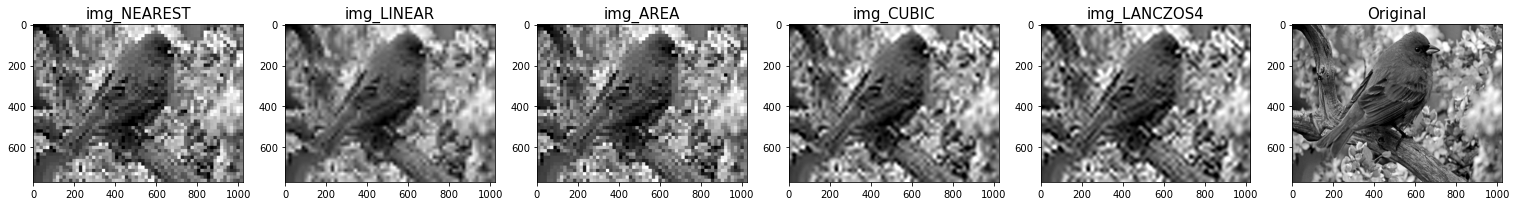

In [2]:
                                #Primer y Segundo Punto

#Imagenes para probar desempeño (misma imagen, con distintos tamaños)
img_small = cv2.imread('Imagenes/Bird_64x48.png',0)
img_big = cv2.imread('Imagenes/Bird_1024x768.png',0)
width, height = img_big.shape[:2]
dsize = (height, width)
#Tecnicas a probar (se prueban cambiando el tamaño de la imagen pequeña, con la imagen grande, aplicando las distintas interpolaciónes que ofrece OpenCV; para luego comparar los diferentes resultados con la imagen original del mismo tamaño)
#INTER_NEAREST:
img_NEAREST = cv2.resize(img_small,dsize,interpolation=cv2.INTER_NEAREST)
#INTER_LINEAR:
img_LINEAR = cv2.resize(img_small,dsize,interpolation=cv2.INTER_LINEAR)
#INTER_AREA:
img_AREA = cv2.resize(img_small,dsize,interpolation=cv2.INTER_AREA)
#INTER_CUBIC:
img_CUBIC = cv2.resize(img_small,dsize,interpolation=cv2.INTER_CUBIC)
#INTER_LANCZOS4:
img_LANCZOS4 = cv2.resize(img_small,dsize,interpolation=cv2.INTER_LANCZOS4)

#Visualizacion resulatado 
plt.figure(1)
plt.subplot(161), plt.imshow(img_NEAREST, cmap='gray'), plt.title('img_NEAREST', fontsize=15)
plt.subplot(162), plt.imshow(img_LINEAR, cmap='gray'), plt.title('img_LINEAR', fontsize=15)
plt.subplot(163), plt.imshow(img_AREA, cmap='gray'), plt.title('img_AREA', fontsize=15)
plt.subplot(164), plt.imshow(img_CUBIC, cmap='gray'), plt.title('img_CUBIC', fontsize=15)
plt.subplot(165), plt.imshow(img_LANCZOS4, cmap='gray'), plt.title('img_LANCZOS4', fontsize=15)
plt.subplot(166), plt.imshow(img_big, cmap='gray'), plt.title('Original', fontsize=15)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to labels 
plt.subplots_adjust(top=3.8, bottom=0.2, left=0.4, right=3.8, hspace=0.025, wspace=0.2)
plt.show()



In [3]:
                                    # tercer punto
#Definición de la función para rotar una imagen, un angulo dado)
def rotImg(imagen, angulo):
    width, height = imagen.shape[:2]
    #usando trigonometría y las medidas de la imagen original, se definen dos nuevas medidas para que la imagen rotada pueda estar contenida (se suman 1 pixel a cada lado ya que al trabajar con senos y cosenos no siempre se dan direcciónes exactas, y al aproximarlas, puede dar coordenadas fuera de la frontera, estos pixeles extra aseguran que sin importar la aproximación, todos los nuevos puntos, estén dentro de la nueva imagen)
    width_=int(round(height*np.abs(np.sin(angulo*(np.pi/180)))+width*np.abs(np.cos(angulo*(np.pi/180)))))+2
    height_=int(round(height*np.abs(np.cos(angulo*(np.pi/180)))+width*np.abs(np.sin(angulo*(np.pi/180)))))+2
    img_rot = np.zeros((width_,height_),np.uint8)
    #para cada cuadrante hay una rotación diferente, que consta de la matriz de rotación para todos, y un offset diferente, para que la imagen no se vea cortada debido al cambio de posición del punto 0
    if angulo > 0 and angulo <= 90:
        for i in range(width):
            for j in range(height):
                w = int(round(i*np.cos(angulo*(np.pi/180))-j*np.sin(angulo*(np.pi/180))+height*np.sin(angulo*(np.pi/180))))
                h = int(round(i*np.sin(angulo*(np.pi/180))+j*np.cos(angulo*(np.pi/180))))
                temp=imagen[i,j]
                img_rot[w,h]=temp
    elif angulo > 90 and angulo <= 180:
        for i in range(width):
            for j in range(height):
                w = int(round(i*np.cos(angulo*(np.pi/180))-j*np.sin(angulo*(np.pi/180))))
                h = int(round(i*np.sin(angulo*(np.pi/180))+j*np.cos(angulo*(np.pi/180))-height*np.cos(angulo*(np.pi/180))))
                temp=imagen[i,j]
                img_rot[w,h]=temp
    elif angulo > 180 and angulo <= 270:
        for i in range(width):
            for j in range(height):
                w = int(round(i*np.cos(angulo*(np.pi/180))-j*np.sin(angulo*(np.pi/180))+height*np.sin(angulo*(np.pi/180))))
                h = int(round(i*np.sin(angulo*(np.pi/180))+j*np.cos(angulo*(np.pi/180))))
                temp=imagen[i,j]
                img_rot[w,h]=temp
    elif angulo > 270 and angulo <= 360:
        for i in range(width):
            for j in range(height):
                w = int(round(i*np.cos(angulo*(np.pi/180))-j*np.sin(angulo*(np.pi/180))))
                h = int(round(i*np.sin(angulo*(np.pi/180))+j*np.cos(angulo*(np.pi/180))-height*np.cos(angulo*(np.pi/180))))
                temp=imagen[i,j]
                img_rot[w,h]=temp



    #Visualizacion resulatado 
    plt.figure(1)
    plt.subplot(121), plt.imshow(imagen, cmap='gray'), plt.title('Original')
    plt.subplot(122), plt.imshow(img_rot, cmap='gray'), plt.title('Rotada')

    # Adjust the subplot layout, because the logit one may take more space
    # than usual, due to labels 
    plt.subplots_adjust(top=1.9, bottom=0.1, left=0.20, right=1.9, hspace=0.25, wspace=0.35)

    plt.show()


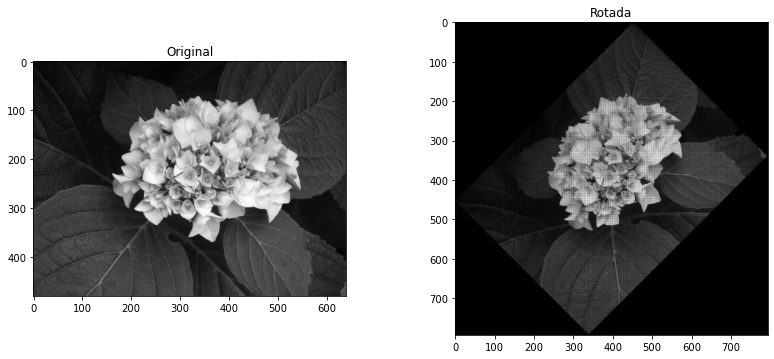

In [4]:
#test de la función, con la imagen usada, para rotación en el primer cuadrante
img1 = cv2.imread('Imagenes/Flores.png',0)
ang=45
rotImg(img1,ang)

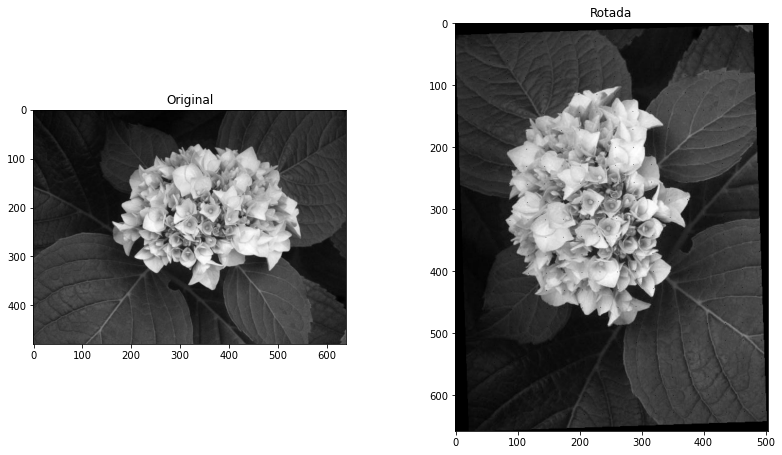

In [5]:
#test de la función, con la imagen usada, para rotación en el segundo cuadrante
img1 = cv2.imread('Imagenes/Flores.png',0)
ang=92
rotImg(img1,ang)

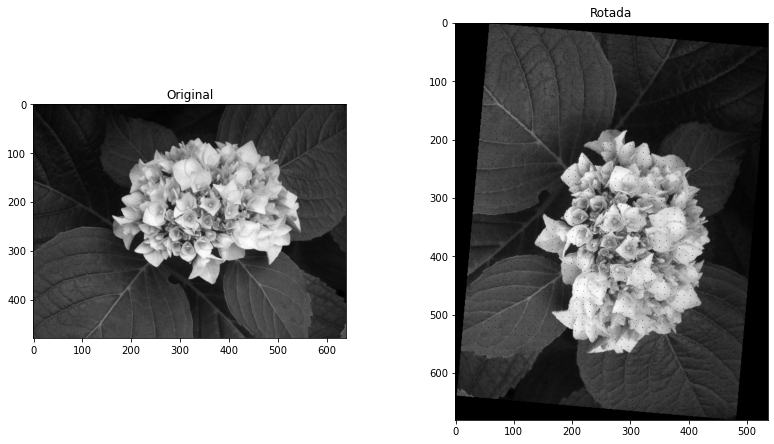

In [6]:
#test de la función, con la imagen usada, para rotación en el tercer cuadrante
img1 = cv2.imread('Imagenes/Flores.png',0)
ang=265
rotImg(img1,ang)

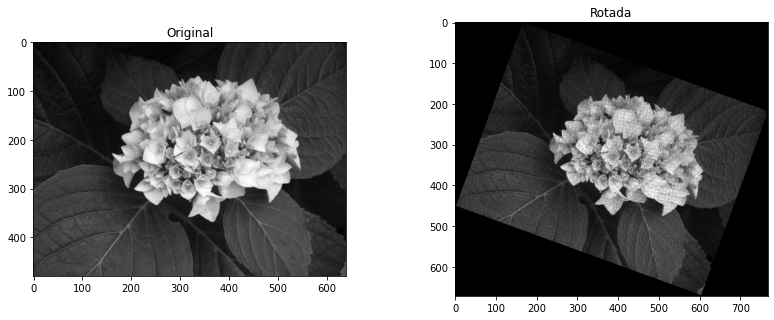

In [7]:
#test de la función, con la imagen usada, para rotación en el cuarto cuadrante
img1 = cv2.imread('Imagenes/Flores.png',0)
ang=340
rotImg(img1,ang)

<h1 style="font-size:300%; background-color:powderblue; color:red; text-align:center; line-height : 60px;">
TAREA 2 </h1>
<img src="Imagenes/Enunciado.png",width=850,height=300>

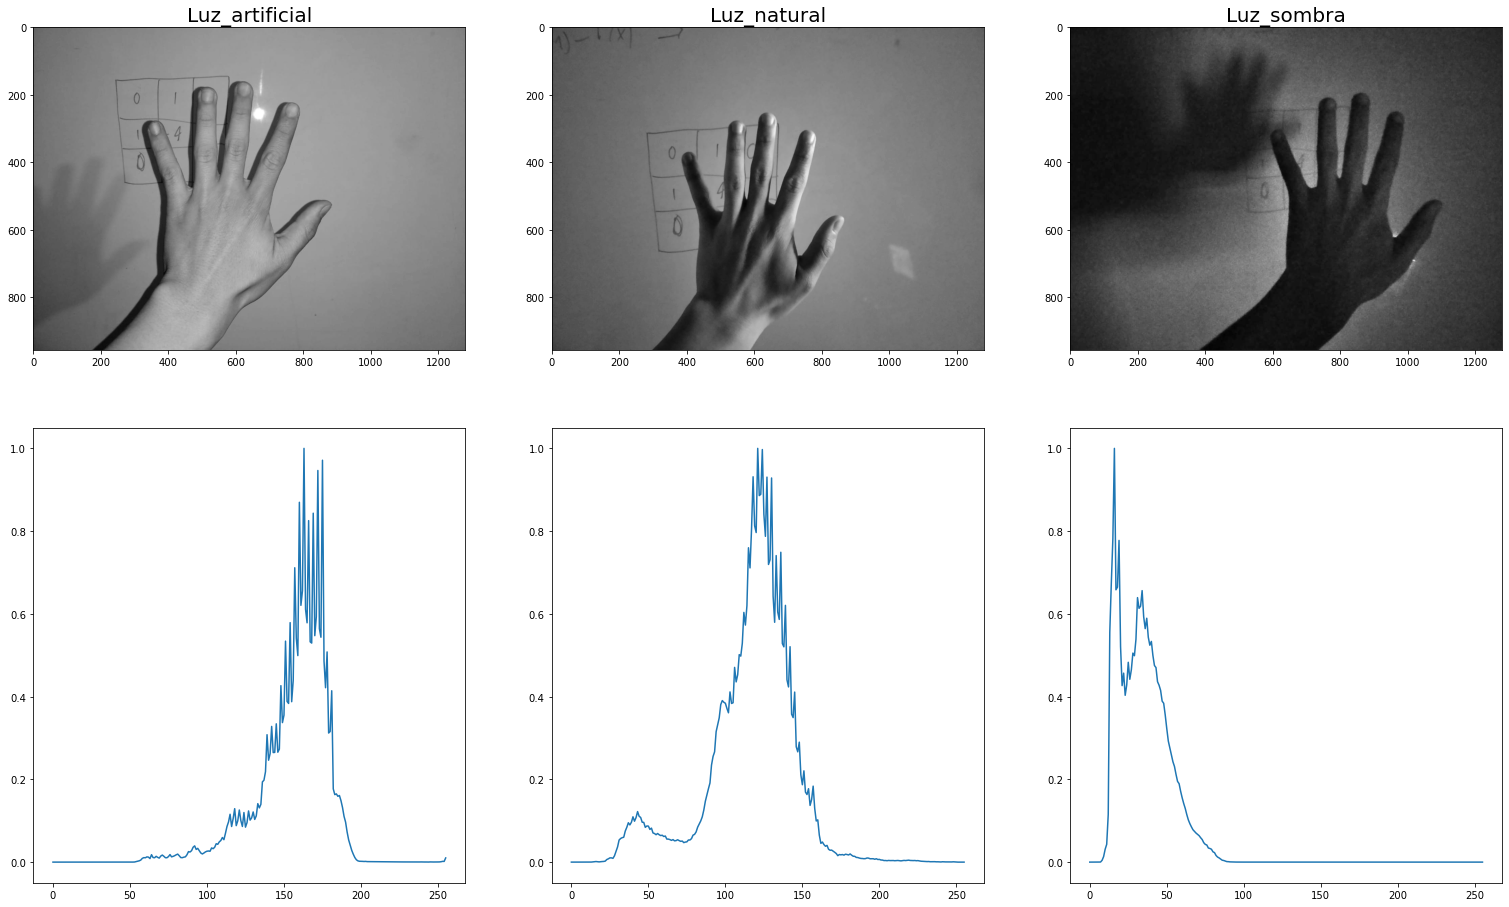

In [95]:
#Imagenes bajo condiciones de luz diferentes con sus respectivos histogramas
img_mano1 = cv2.imread('Imagenes/Mano1.jpeg',0)
img_mano2 = cv2.imread('Imagenes/Mano2.jpeg',0)
img_mano3 = cv2.imread('Imagenes/Mano3.jpeg',0)

hist1_2=cv2.calcHist([img_mano1],[0],None,[2],[0,256])
hist2_2=cv2.calcHist([img_mano2],[0],None,[2],[0,256])
hist3_2=cv2.calcHist([img_mano3],[0],None,[2],[0,256])

hist1_8=cv2.calcHist([img_mano1],[0],None,[8],[0,256])
hist2_8=cv2.calcHist([img_mano2],[0],None,[8],[0,256])
hist3_8=cv2.calcHist([img_mano3],[0],None,[8],[0,256])

hist1_16=cv2.calcHist([img_mano1],[0],None,[16],[0,256])
hist2_16=cv2.calcHist([img_mano2],[0],None,[16],[0,256])
hist3_16=cv2.calcHist([img_mano3],[0],None,[16],[0,256])

hist1_32=cv2.calcHist([img_mano1],[0],None,[32],[0,256])
hist2_32=cv2.calcHist([img_mano2],[0],None,[32],[0,256])
hist3_32=cv2.calcHist([img_mano3],[0],None,[32],[0,256])

hist1_256=cv2.calcHist([img_mano1],[0],None,[256],[0,256])
hist2_256=cv2.calcHist([img_mano2],[0],None,[256],[0,256])
hist3_256=cv2.calcHist([img_mano3],[0],None,[256],[0,256])


hist1_2_n = cv2.normalize(hist1_2,hist1_2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist2_2,hist2_2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist3_2,hist3_2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

cv2.normalize(hist1_8,hist1_8, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist2_8,hist2_8, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist3_8,hist3_8, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

cv2.normalize(hist1_16,hist1_16, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist2_16,hist2_16, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist3_16,hist3_16, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist1_32_n = cv2.normalize(hist1_32,hist1_32, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist2_32,hist2_32, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist3_32,hist3_32, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist1_256_n = cv2.normalize(hist1_256,hist1_256, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist2_256_n = cv2.normalize(hist2_256,hist2_256, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist3_256_n = cv2.normalize(hist3_256,hist3_256, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

plt.figure(1)
plt.subplot(231), plt.imshow(img_mano1, cmap='gray'), plt.title('Luz_artificial', fontsize=20)
plt.subplot(232), plt.imshow(img_mano2, cmap='gray'), plt.title('Luz_natural', fontsize=20)
plt.subplot(233), plt.imshow(img_mano3, cmap='gray'), plt.title('Luz_sombra', fontsize=20)
plt.subplot(234), plt.plot(hist1_256) 
plt.subplot(235), plt.plot(hist2_256)
plt.subplot(236), plt.plot(hist3_256)

plt.subplots_adjust(top=3.8, bottom=0.6, left=0.4, right=3.8, hspace=0.025, wspace=0.2)
plt.show()

In [104]:
img_mano1 = cv2.imread('Imagenes/Mano1.jpeg',0)
print(img_mano1.shape)
img_f=cv2.normalize(img_mano1,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
hist_f=cv2.calcHist([img_f],[0],None,[256],[0,255])
hist_f_n = cv2.normalize(hist_f,hist_f, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

(957, 1280)


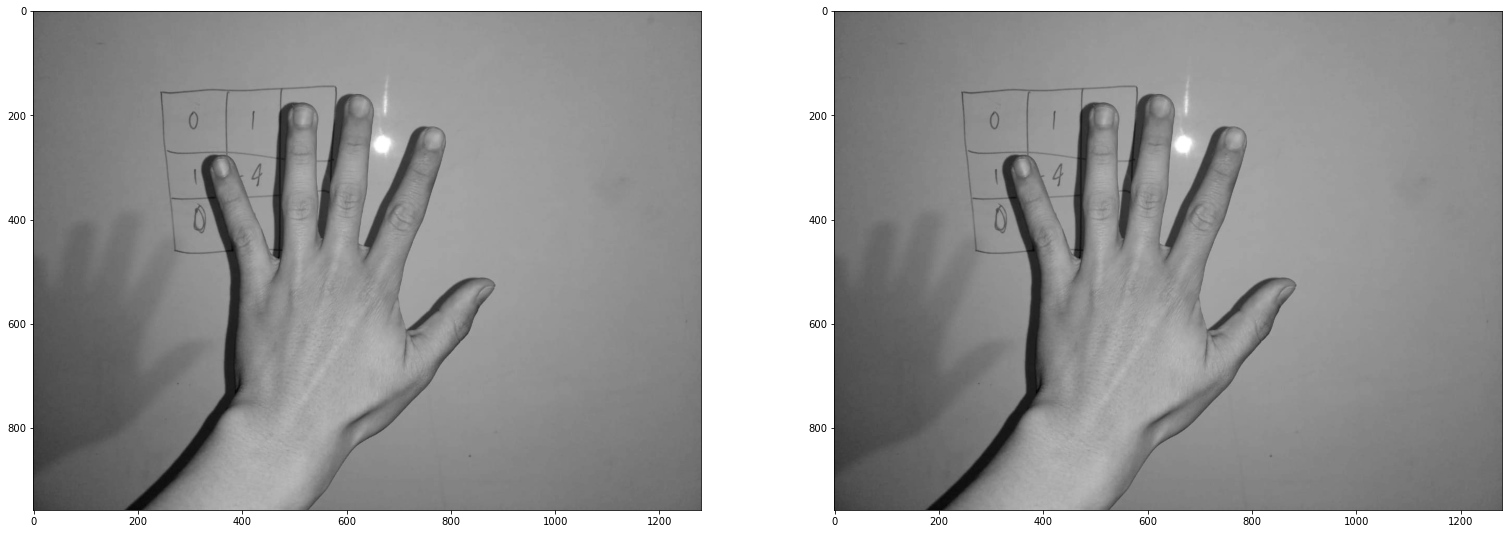

In [105]:
plt.figure(1)
plt.subplot(121), plt.imshow(img_mano1,cmap='gray')
plt.subplot(122), plt.imshow(img_f,cmap='gray')
plt.subplots_adjust(top=3.8, bottom=0.6, left=0.4, right=3.8, hspace=0.025, wspace=0.2)
plt.show()

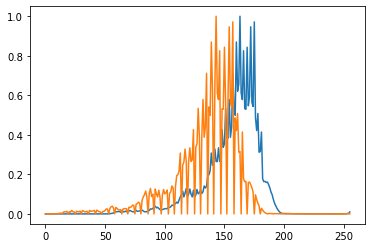

In [106]:
plt.plot(hist1_256_n)

plt.plot(hist_f_n)
#comp1_1=cv2.compareHist(hist1_256_n,hist1,metodos.get(index))

In [9]:
def compare(hist1,hist2,hist3,index):
    metodos = {
        0: cv2.HISTCMP_CORREL,
        1: cv2.HISTCMP_CHISQR,
        2: cv2.HISTCMP_INTERSECT,
        3: cv2.HISTCMP_BHATTACHARYYA
    }
    nombres = {
        0: "Correlación",
        1: "Chi-Cuadrado",
        2: "Intersección",
        3: "Distancia de Bhattacharyya"
    }

    comp1_1=cv2.compareHist(hist1,hist1,metodos.get(index))
    comp1_2=cv2.compareHist(hist1,hist2,metodos.get(index))
    comp1_3=cv2.compareHist(hist1,hist3,metodos.get(index))
    comp2_1=cv2.compareHist(hist2,hist1,metodos.get(index))
    comp2_2=cv2.compareHist(hist2,hist2,metodos.get(index))
    comp2_3=cv2.compareHist(hist2,hist3,metodos.get(index))
    comp3_1=cv2.compareHist(hist3,hist1,metodos.get(index))
    comp3_2=cv2.compareHist(hist3,hist2,metodos.get(index))
    comp3_3=cv2.compareHist(hist3,hist3,metodos.get(index))
    print('')
    print('Comparación por ',nombres.get(index))
    print(tabulate([['Artificial', comp1_1, comp1_2, comp1_3], ['Natural', comp2_1, comp2_2, comp2_3], ['Sombra', comp3_1, comp3_2, comp3_3]], headers=['', 'Artificial', 'Natural', 'Sombra'], tablefmt='orgtbl'))

In [10]:
print('Histogramas con 2 bins')
for x in range(4):
  compare(hist1_2,hist2_2,hist3_2,x)
print('------------------------------------------------------------------------------------------------------')
print('Histogramas con 8 bins')
for x in range(4):
  compare(hist1_8,hist2_8,hist3_8,x)
print('------------------------------------------------------------------------------------------------------')
print('Histogramas con 16 bins')
for x in range(4):
  compare(hist1_16,hist2_16,hist3_16,x)
print('------------------------------------------------------------------------------------------------------')
print('Histogramas con 32 bins')
for x in range(4):
  compare(hist1_32,hist2_32,hist3_32,x)
print('------------------------------------------------------------------------------------------------------')
print('Histogramas con 256 bins')
for x in range(4):
  compare(hist1_256,hist2_256,hist3_256,x)
print('------------------------------------------------------------------------------------------------------')

Histogramas con 2 bins

Comparación por  Correlación
|            |   Artificial |   Natural |   Sombra |
|------------+--------------+-----------+----------|
| Artificial |            1 |        -1 |       -1 |
| Natural    |           -1 |         1 |        1 |
| Sombra     |           -1 |         1 |        1 |

Comparación por  Chi-Cuadrado
|            |   Artificial |     Natural |      Sombra |
|------------+--------------+-------------+-------------|
| Artificial |            0 | 1           | 1           |
| Natural    |            1 | 0           | 1.42109e-14 |
| Sombra     |            1 | 1.42109e-14 | 0           |

Comparación por  Intersección
|            |   Artificial |   Natural |   Sombra |
|------------+--------------+-----------+----------|
| Artificial |            1 |         0 |        0 |
| Natural    |            0 |         1 |        1 |
| Sombra     |            0 |         1 |        1 |

Comparación por  Distancia de Bhattacharyya
|            |   Art

Aspectos notables:

-como era de esperarse, los valores de correlación más negativos eran los que resultaban al comparar iluminación artificial, con sombra; así mismo estos eran los valores más grandes en la comparación por el metodo de chi-cuadrado, los más bajos con el metodo de intersección, y los más cercanos a 1 con el metodo de Bhattacharyya

-los metodos generan un patrón simetrico, excepto el metodo de chi cuadrado, esto se debe a que la formula usada en opencv sólo depende del primer histograma en el denominador